In [1]:
import os
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from metrics.visualization import visualization

%matplotlib inline

## PCA and t-SNE visualization

In [2]:
path = "output/test"

with open(f"{path}/test_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

(131, 100, 1) (131, 100, 1)


In [3]:
print("Original data", ori_data)
print("New data", new_data)

Original data [[[ 0.88888889]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.45679012]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.7037037 ]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 ...

 [[ 0.83950617]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.54320988]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.35802469]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]]
New data [[[ 0.71423686]
  [-0.99888015]
  [-0.99888015]
  ...
  [-0.99888015]
  [-0.99888015]
  [-0.99888015]]

 [[ 0.1957463 ]
  [-0.99888015]
  [-0.99888015]
  ...
  [-0.99888015]
  [-0.99888015]
  [-0.99888015]]

 [[ 0.19847095]
  [-0.99888015]
  [-0.99888015]
  ...
  [-0.99888015]
  [-0.99888015]
  [-0.99888015]]

 ...

 [[ 0.19541755]
  [-0.9988801

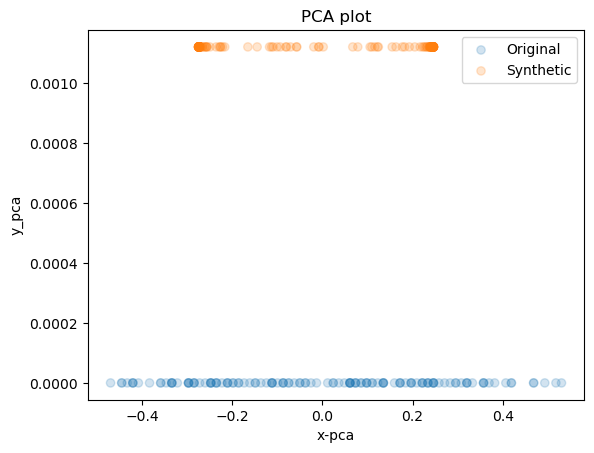

In [4]:
visualization(ori_data, new_data, 'pca')

c:\Users\afons\miniconda3\envs\gasten3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\afons\miniconda3\envs\gasten3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 262 samples in 0.001s...
[t-SNE] Computed neighbors for 262 samples in 0.181s...
[t-SNE] Computed conditional probabilities for sample 262 / 262
[t-SNE] Mean sigma: 0.009745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.750057
[t-SNE] KL divergence after 300 iterations: 0.094868


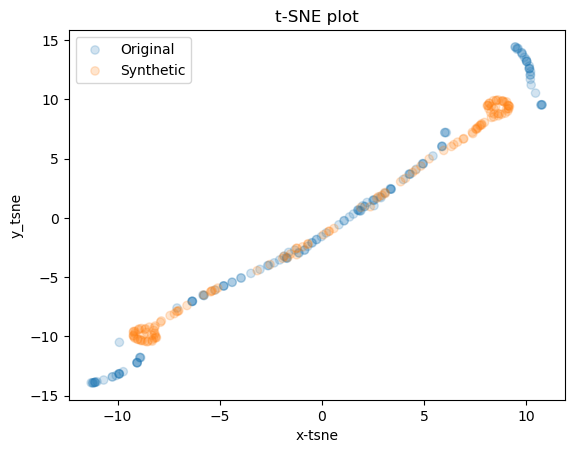

In [5]:
visualization(ori_data, new_data, 'tsne')

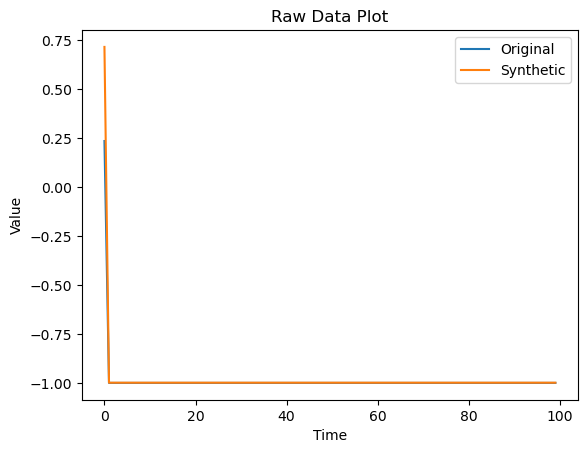

In [6]:
import random

# Select a random instance index
idx = random.randint(0, len(ori_data) - 1)
plt.plot(ori_data[idx,:,0], label='Original')  # Plotting the first feature of the selected instance
plt.plot(new_data[idx,:,0], label='Synthetic')  # Plotting the first feature of the selected instance from generated data

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Raw Data Plot')
plt.legend()
plt.show()

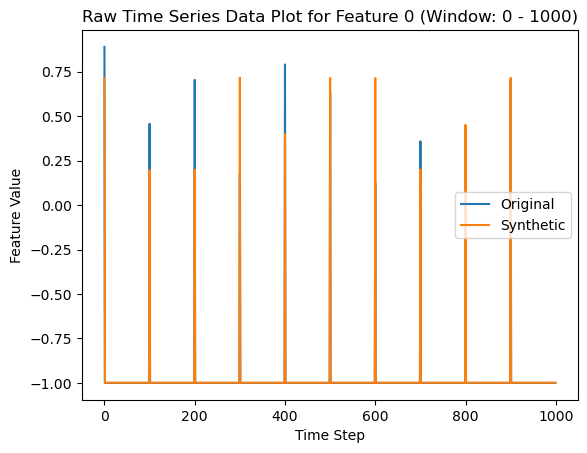

In [7]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Define the start and end indices of the window
window_start = 0
window_end = 1000  # Adjust this value to define the end of the window

# Flatten the arrays to plot the time series data for the selected feature within the window
ori_data_flattened = ori_data[:, window_start:window_end, feature_index].flatten()
new_data_flattened = new_data[:, window_start:window_end, feature_index].flatten()

# Generate corresponding time step indices for the window
time_steps = np.arange(window_start, window_end)

# Plot the time series data within the window with corresponding time steps
plt.plot(time_steps, ori_data_flattened[:window_end - window_start], label='Original')
plt.plot(time_steps, new_data_flattened[:window_end - window_start], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (Window: {} - {})'.format(feature_index, window_start, window_end))
plt.legend()
plt.show()


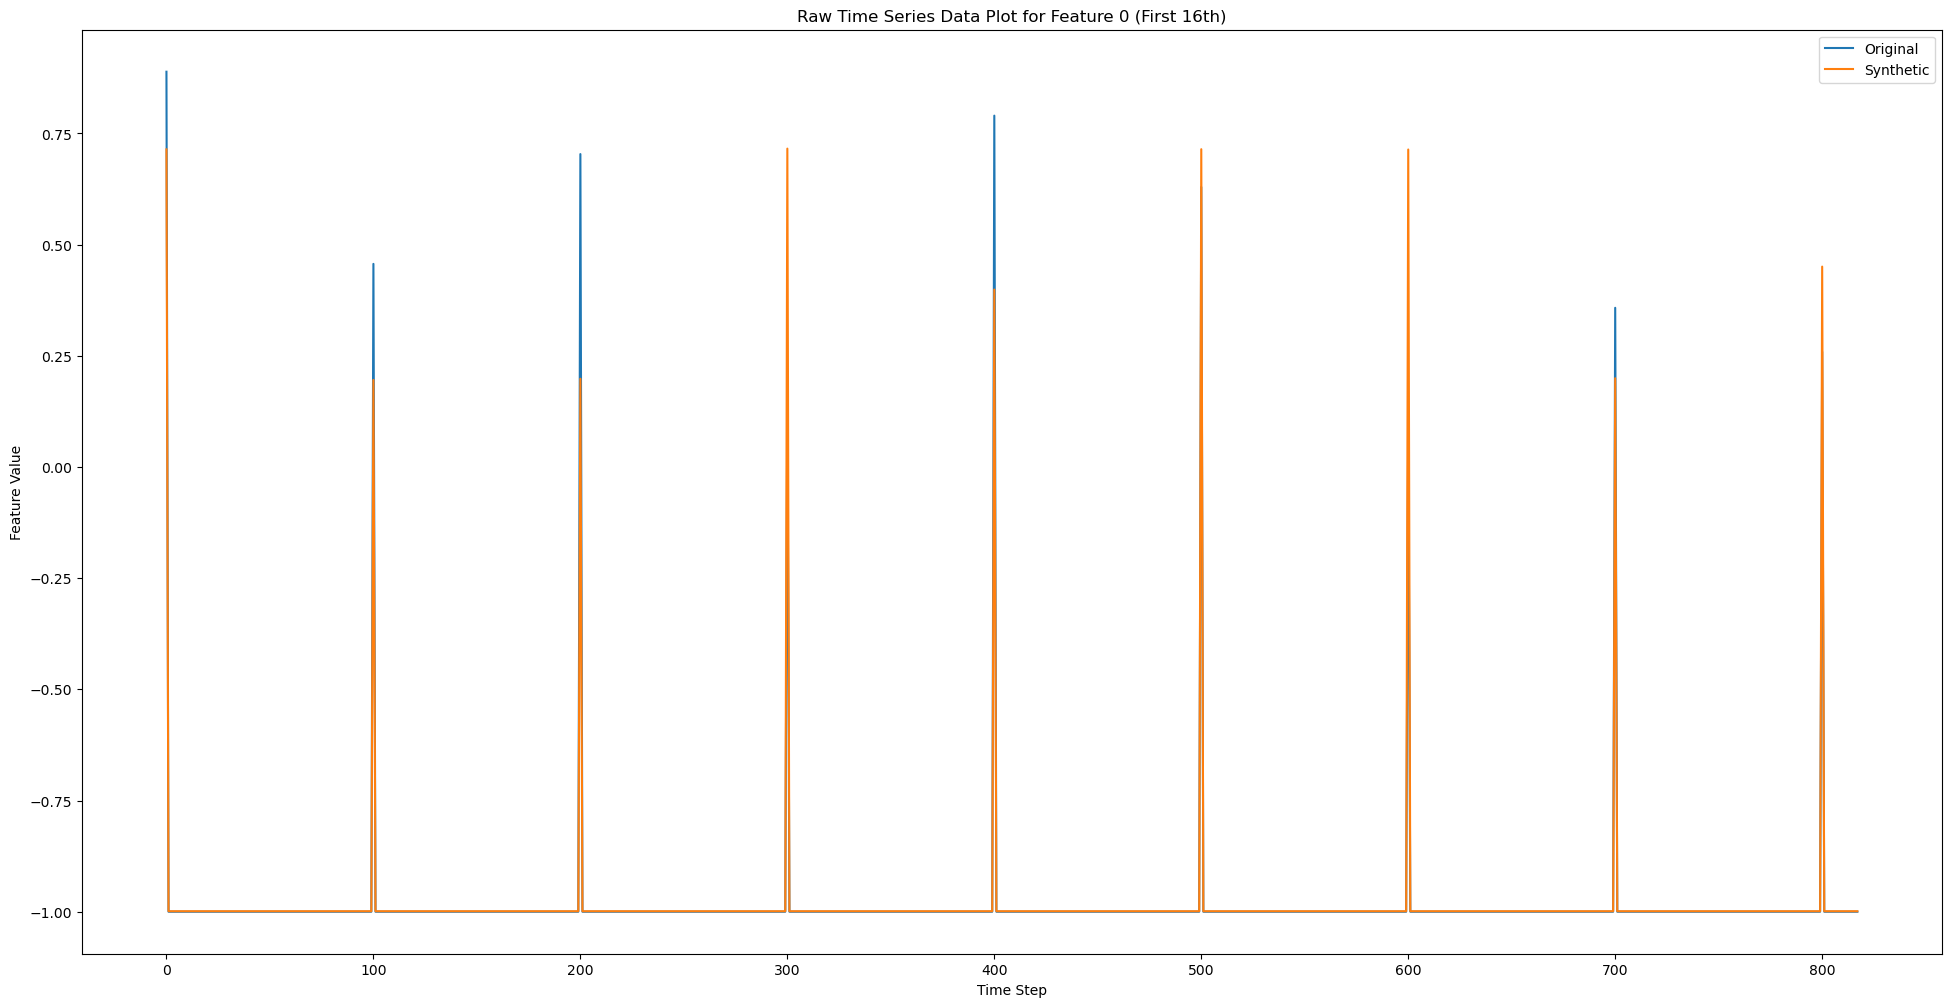

In [8]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Flatten the arrays to plot the full time series data for the selected feature
ori_data_flattened = ori_data[:,:,feature_index].flatten()
new_data_flattened = new_data[:,:,feature_index].flatten()

# Generate corresponding time step indices
time_steps = np.arange(len(ori_data_flattened))

# Set the figure size
plt.figure(figsize=(24, 12))  # Adjust width and height as needed

# Determine the length of the time series data
total_time_steps = len(ori_data_flattened)

# Calculate the range for the quarter of the data
quarter_range = total_time_steps // 16

# Plot only the first quarter of the data
plt.plot(time_steps[:quarter_range], ori_data_flattened[:quarter_range], label='Original')
plt.plot(time_steps[:quarter_range], new_data_flattened[:quarter_range], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (First 16th)'.format(feature_index))
plt.legend()
plt.show()

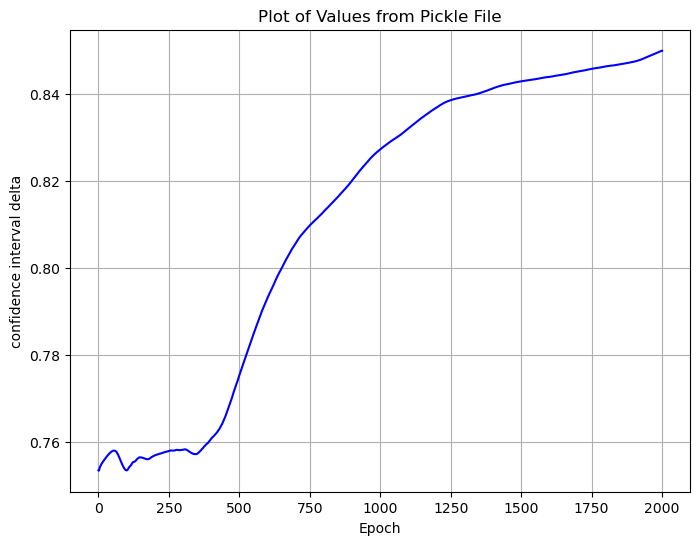

In [6]:
import pickle
import matplotlib.pyplot as plt
path = "output/test"


# Load the list of values from the pickle file
with open(f"{path}/aOrder_0_0_0_confIntrv.pickle", 'rb') as f:
    values_list = pickle.load(f)

# Check if the loaded data is a list or a single value
if not isinstance(values_list, list):
    values_list = [values_list]  # Convert to list if it's a single value

# Plot the values
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

plt.plot(values_list, linestyle='-', color='b')  # Plot the values
plt.title('Plot of Values from Pickle File')  # Set plot title
plt.xlabel('Epoch')  # Set x-axis label (optional)
plt.ylabel('confidence interval delta')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)

plt.show()  # Display the plot

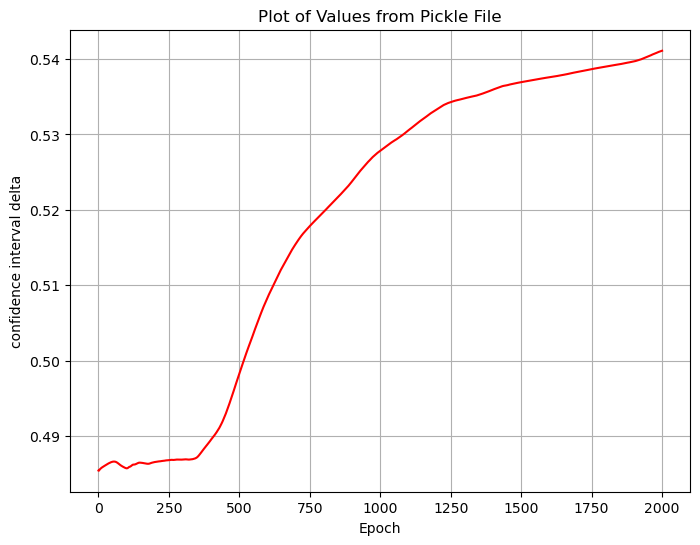

In [5]:
import pickle
import matplotlib.pyplot as plt
path = "output/test"


# Load the list of values from the pickle file
with open(f"{path}/aOrder_0_0_0_confIntrv_25pc.pickle", 'rb') as f:
    values_list = pickle.load(f)

# Check if the loaded data is a list or a single value
if not isinstance(values_list, list):
    values_list = [values_list]  # Convert to list if it's a single value

# Plot the values
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

plt.plot(values_list, linestyle='-', color='r')  # Plot the values
plt.title('Plot of Values from Pickle File')  # Set plot title
plt.xlabel('Epoch')  # Set x-axis label (optional)
plt.ylabel('confidence interval delta')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)

plt.show()  # Display the plot

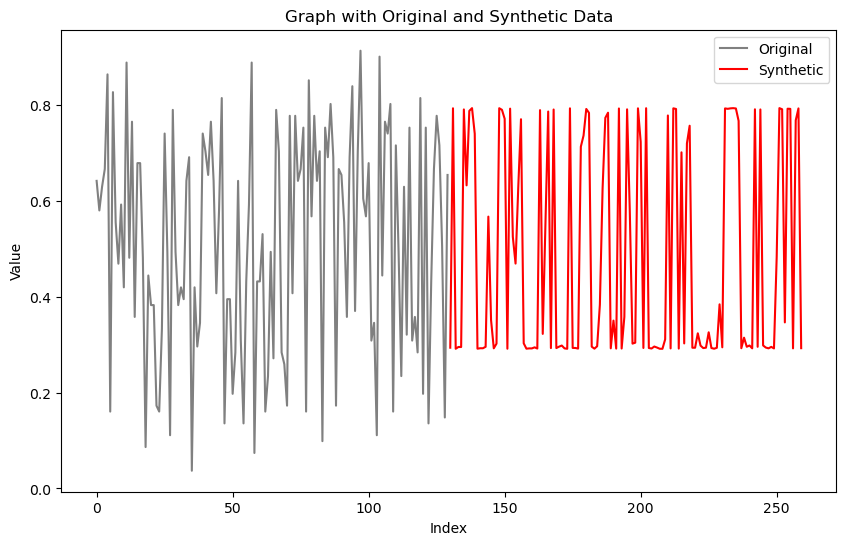

In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(train, test):
    # Prepare DataFrame for original data (train) and synthetic data (test)
    new_train = pd.DataFrame({'idx': range(len(train)), 'val': train[:, 0, 0]})
    new_test = pd.DataFrame({'idx': range(len(train), len(train) + len(test)), 'val': test[:, 0, 0]})
    
    return new_train, new_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/fake_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_synthetic = prepare_data(ori_data, fake_data)

# Plotting both graphs
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_synthetic['idx'], df_synthetic['val'], color='red', label='Synthetic')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Graph with Original and Synthetic Data')

# Add legend
plt.legend()

# Show plot
plt.show()



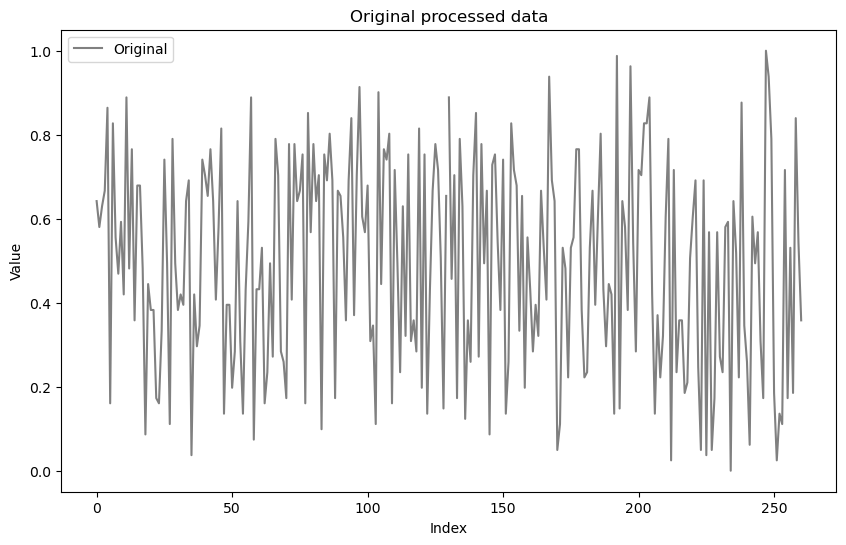

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(train, test):
    # Prepare DataFrame for original data (train) and synthetic data (test)
    new_train = pd.DataFrame({'idx': range(len(train)), 'val': train[:, 0, 0]})
    new_test = pd.DataFrame({'idx': range(len(train), len(train) + len(test)), 'val': test[:, 0, 0]})
    
    return new_train, new_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/test_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_synthetic = prepare_data(ori_data, fake_data)

# Plotting both graphs
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_synthetic['idx'], df_synthetic['val'], color='gray')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original processed data')

# Add legend
plt.legend()

# Show plot
plt.show()

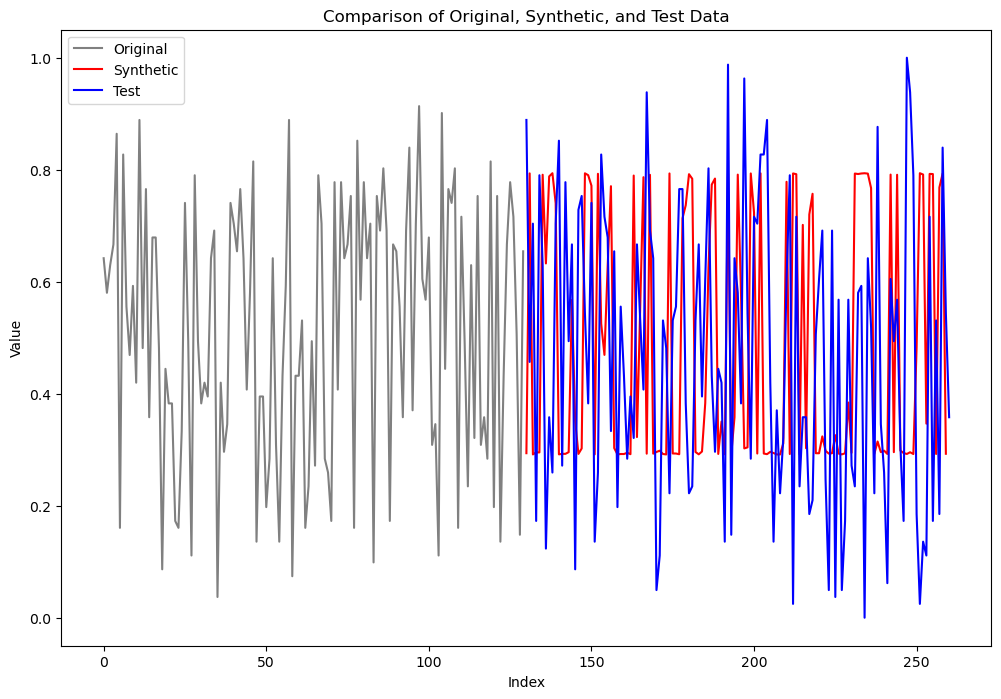

In [21]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(train, test):
    # Prepare DataFrame for data (train or test)
    data_df = pd.DataFrame({'idx': range(len(train)), 'val': train[:, 0, 0]})
    data_df_test = pd.DataFrame({'idx': range(len(train), len(train) + len(test)), 'val': test[:, 0, 0]})
    
    return data_df, data_df_test

# Load original, fake, and test data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/fake_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/test_data.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_fake = prepare_data(ori_data, fake_data)
_, df_test = prepare_data(ori_data, test_data)

# Plotting both graphs on the same figure
plt.figure(figsize=(12, 8))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_fake['idx'], df_fake['val'], color='red', label='Synthetic')

# Plot test data in blue
plt.plot(df_test['idx'], df_test['val'], color='blue', label='Test')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Original, Synthetic, and Test Data')

# Add legend
plt.legend()

# Show plot
plt.show()


Saved data/m6_assets\ABBV.csv
Saved data/m6_assets\ACN.csv
Saved data/m6_assets\AEP.csv
Saved data/m6_assets\AIZ.csv
Saved data/m6_assets\ALLE.csv
Saved data/m6_assets\AMAT.csv
Saved data/m6_assets\AMP.csv
Saved data/m6_assets\AMZN.csv
Saved data/m6_assets\AVB.csv
Saved data/m6_assets\AVY.csv
Saved data/m6_assets\AXP.csv
Saved data/m6_assets\BDX.csv
Saved data/m6_assets\BF-B.csv
Saved data/m6_assets\BMY.csv
Saved data/m6_assets\BR.csv
Saved data/m6_assets\CARR.csv
Saved data/m6_assets\CDW.csv
Saved data/m6_assets\CE.csv
Saved data/m6_assets\CHTR.csv
Saved data/m6_assets\CNC.csv
Saved data/m6_assets\CNP.csv
Saved data/m6_assets\COP.csv
Saved data/m6_assets\CTAS.csv
Saved data/m6_assets\CZR.csv
Saved data/m6_assets\DG.csv
Saved data/m6_assets\DPZ.csv
Saved data/m6_assets\DRE.csv
Saved data/m6_assets\DXC.csv
Saved data/m6_assets\EWA.csv
Saved data/m6_assets\EWC.csv
Saved data/m6_assets\EWG.csv
Saved data/m6_assets\EWH.csv
Saved data/m6_assets\EWJ.csv
Saved data/m6_assets\EWL.csv
Saved dat